In [1]:
import pandas as pd #importing the Pandas module/library
#from altair import Chart, X, Y, Axis, SortField

In [2]:
df = pd.read_csv('spacexdb.csv') #reading in/loading the dataset for Space X launches

#### <font color='green'>Let's trim our dataset to create a smaller set consisting of only successful launches</h4></font>

In [3]:
SuccessfulMissions = df.loc[df["Mission Outcome"] == "Success"]

<h4><font color='green'>Similarly, let's create a dataset consisting of only failed launches</h4></font>

In [4]:
FailedMissions = df.loc[df["Mission Outcome"] == "Failure"]

#### <font color='green'>Let's calculate the ratio of successfull launches to unsuccessfull launches</h4></font>

In [5]:
len(SuccessfulMissions.index)/len(FailedMissions.index)

4.125

### <font color="red">This implies: For every 4 successful launches, there was 1 failed launch</font>

### <font color="green"> Which vehicle type had the most successful missions? </font>

In [6]:
SuccessfulMissions["Vehicle Type"].value_counts()

Falcon 9 (v1.1)                15
Falcon 9 Full Thrust (v1.2)    11
Falcon 9 (v1.0)                 5
Falcon 1                        2
Name: Vehicle Type, dtype: int64

### <font color="red"> Which vehicle type had the most unsuccessful missions?  </font>

In [7]:
FailedMissions["Vehicle Type"].value_counts()

Falcon 1                       5
Falcon 9 Full Thrust (v1.2)    1
Falcon 9 (v1.1)                1
Falcon 9 (v1.0)                1
Name: Vehicle Type, dtype: int64

### <font color="green"> Which payload type had the most successful missions? </font>

In [8]:
SuccessfulMissions["Payload Type"].value_counts()

Communication Satellite             16
Space Station Supplies              11
Weather Satellite                    3
Communication/Research Satellite     1
Name: Payload Type, dtype: int64

### <font color="red"> Which payload type had the most unsuccessful missions?  </font>

In [9]:
FailedMissions["Payload Type"].value_counts()

Communication Satellite    3
Space Station Supplies     1
Research Satellite         1
Research Satellites        1
Human Remains              1
Name: Payload Type, dtype: int64

<font color="Blue">I noticed how Communication satellites were on the leaderboard for for the most successfull and unsucessful payload types. Was this just because they had more launches as opposed to other types? Something else?</font>

In [10]:
df["Payload Type"].value_counts()

Communication Satellite             19
Space Station Supplies              12
Weather Satellite                    3
Research Satellite                   1
Research Satellites                  1
Communication/Research Satellite     1
Human Remains                        1
Name: Payload Type, dtype: int64

As suspected, they (Communication satellites) made up for a little less than 50% of the total launches in the dataset(total = 41). We just have more data on them, not that they are equally successfull or unsuccessful. 

<font color="Blue"> Now, let's try depicting the success/failure data based on Customer Type, Customer Country, Payload Mass, Launch Site, etc. using visulizations. </font>

In [39]:
from altair import *

In [40]:
type(SuccessfulMissions["Customer Type"].value_counts())

pandas.core.series.Series

In [41]:
SuccessfulMissions["Customer Type"].value_counts()

Business      16
Government    15
Name: Customer Type, dtype: int64

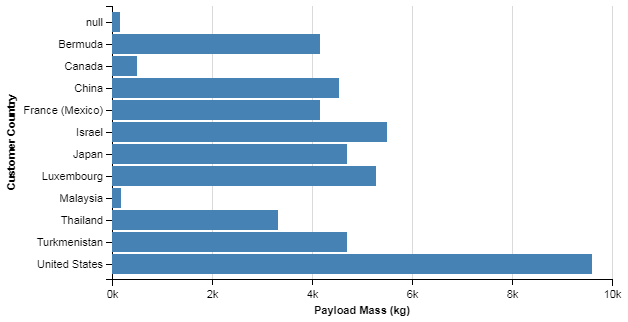

In [46]:
Chart(df).mark_bar().encode(x='Payload Mass (kg)', y='Customer Country') #try plotting value counts

In [47]:
df.head(n=2)

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
